In [11]:
# Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import lightgbm as lgb

,country,year,GDP_constant_USD,Tourism_receipts_USD,Tourism_arrivals,Population,Unemployment_rate_pct,Gross_fixed_capital_formation_pctGDP,Trade_openness_pctGDP,Inflation_pct,Exchange_rate_local_to_USD,Air_transport_passengers,GDP_growth,Tourism_growth
15,Albania,2008,9.861658e+09,1.850000e+09,1420000.0,2947314,13.060,33.305671,75.248547,3.320871,83.894604,2.436910e+05,0.069071,0.250845
14,Albania,2009,1.012701e+10,2.013000e+09,1856000.0,2927519,13.674,32.440459,73.321358,2.266922,94.978120,2.312630e+05,0.026908,0.088108
13,Albania,2010,1.042810e+10,1.778000e+09,2417000.0,2913021,14.086,32.492623,75.532533,3.626047,103.936667,7.685330e+05,0.029732,-0.116741
12,Albania,2011,1.068500e+10,1.833000e+09,2932000.0,2905195,13.481,33.837609,80.698999,3.429123,100.895833,8.297789e+05,0.024635,0.030934
11,Albania,2012,1.079016e+10,1.623000e+09,3514000.0,2900401,13.376,29.715028,76.968358,2.031593,108.184167,8.143397e+05,0.009841,-0.114566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Switzerland,2015,6.941182e+11,2.014000e+10,9305000.0,8282396,4.801,25.074863,117.138482,-1.143909,0.962381,2.701176e+07,0.016446,-0.057028
103,Switzerland,2016,7.084773e+11,1.978700e+10,10402000.0,8373338,4.918,25.561928,123.565925,-0.434619,0.985394,2.585992e+07,0.020687,-0.017527
102,Switzerland,2017,7.181325e+11,2.039900e+10,11133000.0,8451840,4.797,26.044314,123.621807,0.533788,0.984692,2.673257e+07,0.013628,0.030929
101,Switzerland,2018,7.386743e+11,2.129400e+10,11715000.0,8514329,4.713,25.734453,124.428504,0.936335,0.977892,2.885799e+07,0.028604,0.043875


R^2 score: 0.4432
RMSE: 0.0309


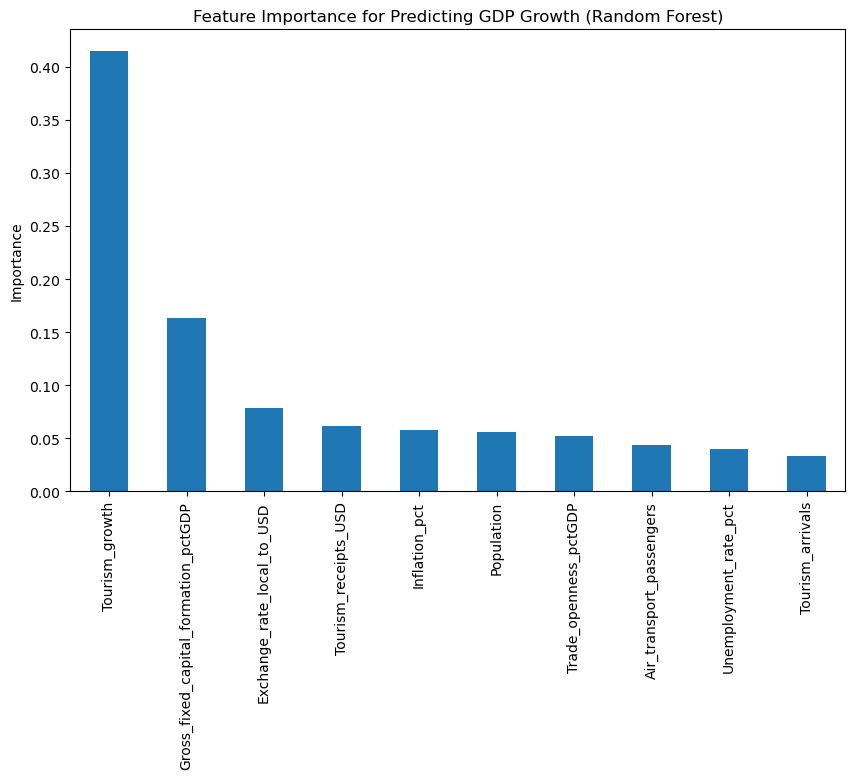


Feature Importance:


Tourism_growth                          0.414488
Gross_fixed_capital_formation_pctGDP    0.163090
Exchange_rate_local_to_USD              0.078551
Tourism_receipts_USD                    0.061184
Inflation_pct                           0.057440
Population                              0.055921
Trade_openness_pctGDP                   0.052297
Air_transport_passengers                0.043369
Unemployment_rate_pct                   0.040003
Tourism_arrivals                        0.033657
dtype: float64

In [12]:
df = pd.read_csv("../europe_tourism_gdp.csv")

# GDP growth = (GDP_current_year - GDP_previous_year) / GDP_previous_year
# Do same for tourism growth
df = df.sort_values(['country', 'year'])

df['GDP_growth'] = df.groupby('country')['GDP_constant_USD'].pct_change()
df['Tourism_growth'] = df.groupby('country')['Tourism_receipts_USD'].pct_change()

features = [
	'Tourism_receipts_USD',
	'Tourism_arrivals',
	'Population',
	'Unemployment_rate_pct',
	'Gross_fixed_capital_formation_pctGDP',
	'Trade_openness_pctGDP',
	'Inflation_pct',
	'Exchange_rate_local_to_USD',
	'Air_transport_passengers',
	'Tourism_growth'
]

target = 'GDP_growth'

df = df.dropna(subset=features + [target])

display(df)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(f"R^2 score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")

# Get importances
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure(figsize=(10,6))
feat_importance.plot(kind='bar')
plt.title('Feature Importance for Predicting GDP Growth (Random Forest)')
plt.ylabel('Importance')
plt.show()

print("\nFeature Importance:")
display(feat_importance)



LightGBM Results:
R^2 score: 0.3938
RMSE: 0.0322


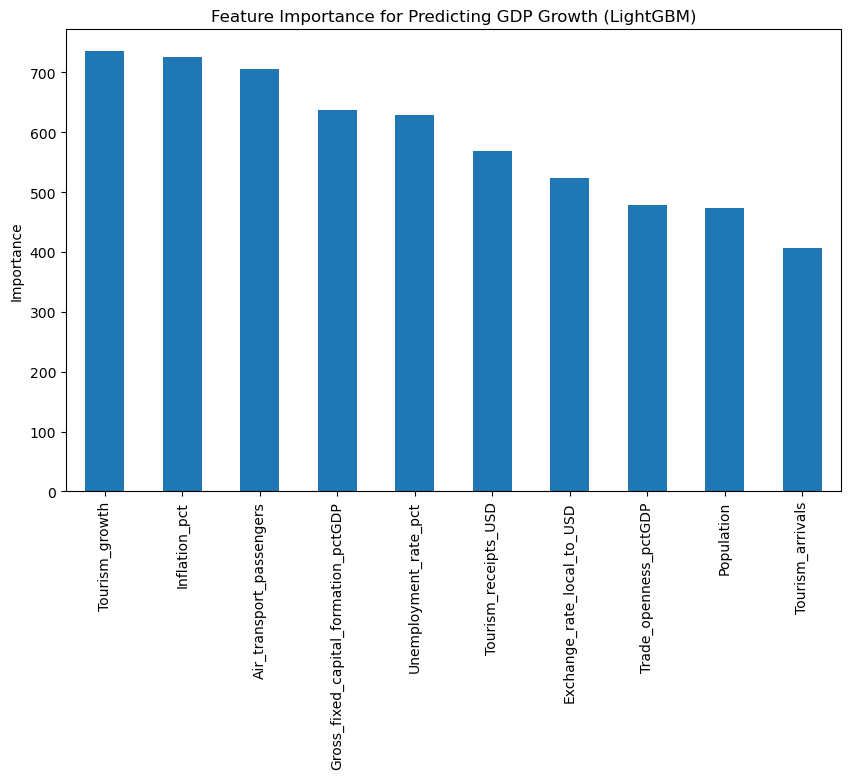


LightGBM Feature Importance:
Tourism_growth                          735
Inflation_pct                           725
Air_transport_passengers                706
Gross_fixed_capital_formation_pctGDP    637
Unemployment_rate_pct                   628
Tourism_receipts_USD                    569
Exchange_rate_local_to_USD              523
Trade_openness_pctGDP                   479
Population                              474
Tourism_arrivals                        407
dtype: int32
Model Comparison:


,Random Forest,LightGBM
R² Score,0.443224,0.393787
RMSE,0.030866,0.032207


In [13]:
# LightGBM Model
lgbm = lgb.LGBMRegressor(n_estimators=500, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)
print("\nLightGBM Results:")
print(f"R^2 score: {r2_score(y_test, y_pred_lgbm):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lgbm, squared=False):.4f}")

# LGBM Feature Importance
lgbm_importance = pd.Series(lgbm.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
lgbm_importance.plot(kind='bar')
plt.title('Feature Importance for Predicting GDP Growth (LightGBM)')
plt.ylabel('Importance')
plt.show()

print("\nLightGBM Feature Importance:")
print(lgbm_importance)

# Create df for model comparisons
comparison = pd.DataFrame({
    'Random Forest': [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False)],
    'LightGBM': [r2_score(y_test, y_pred_lgbm), mean_squared_error(y_test, y_pred_lgbm, squared=False)]
}, index=['R² Score', 'RMSE'])

print("Model Comparison:")
display(comparison)

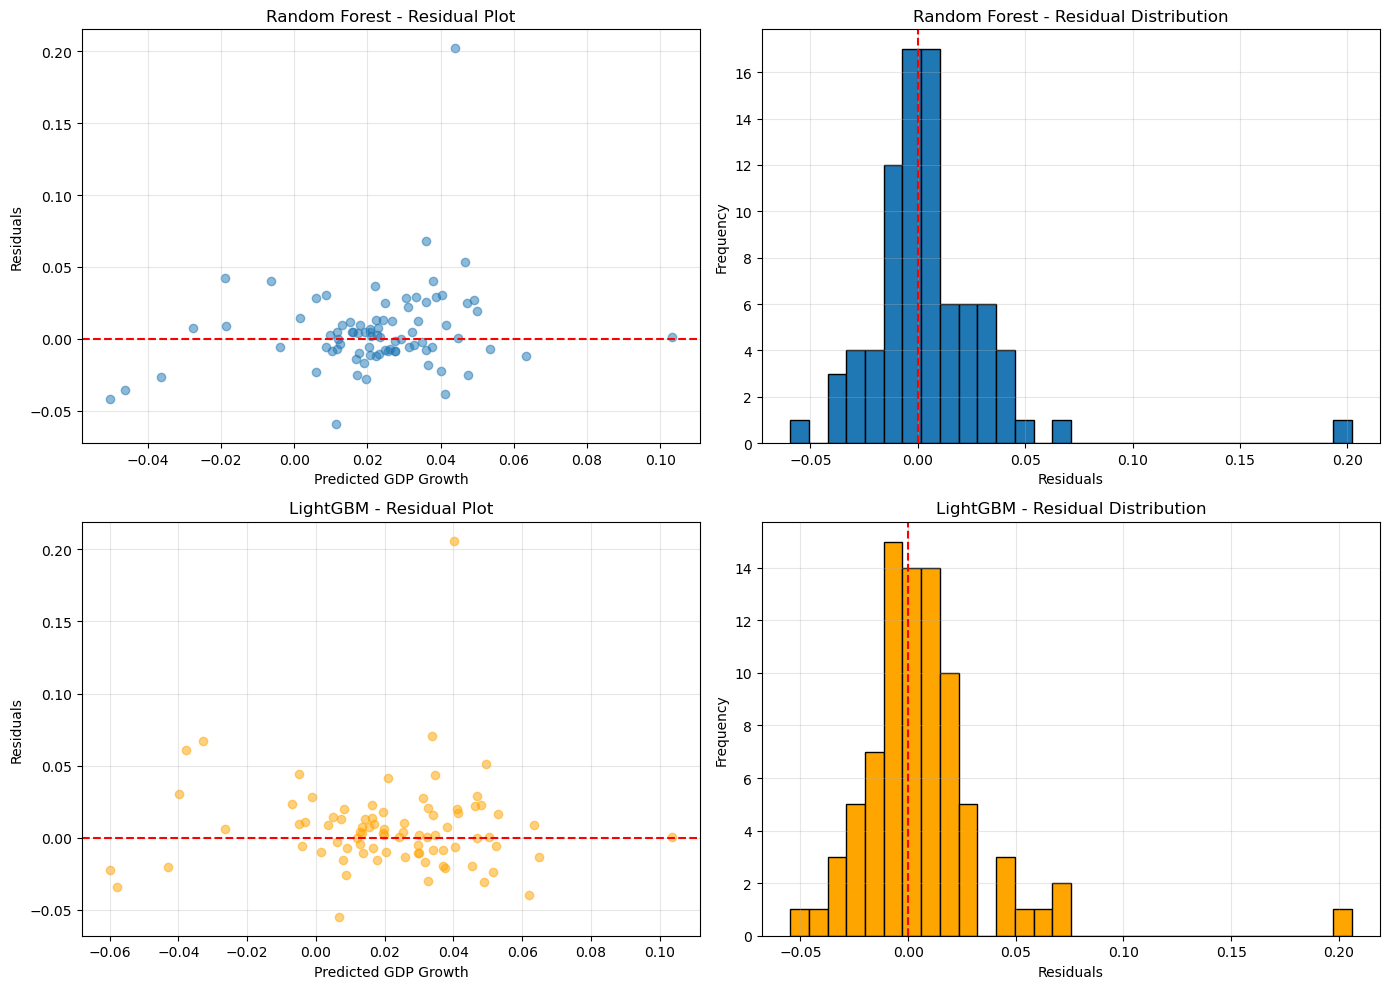


Random Forest:
  Mean Residual: 0.005321
  Std Residual: 0.030588

LightGBM:
  Mean Residual: 0.006738
  Std Residual: 0.031686


In [14]:
# Residual Plots for RF and LightGBM
residuals_rf = y_test - y_pred
residuals_lgbm = y_test - y_pred_lgbm

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Random Forest - Residual Plot
axes[0, 0].scatter(y_pred, residuals_rf, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted GDP Growth')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Random Forest - Residual Plot')
axes[0, 0].grid(True, alpha=0.3)

# Random Forest - Residual Distribution
axes[0, 1].hist(residuals_rf, bins=30, edgecolor='black')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Random Forest - Residual Distribution')
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].grid(True, alpha=0.3)

# LightGBM - Residual Plot
axes[1, 0].scatter(y_pred_lgbm, residuals_lgbm, alpha=0.5, color='orange')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted GDP Growth')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('LightGBM - Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# LightGBM - Residual Distribution
axes[1, 1].hist(residuals_lgbm, bins=30, edgecolor='black', color='orange')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('LightGBM - Residual Distribution')
axes[1, 1].axvline(x=0, color='r', linestyle='--')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual Statistics
print(f"\nRandom Forest:")
print(f"  Mean Residual: {residuals_rf.mean():.6f}")
print(f"  Std Residual: {residuals_rf.std():.6f}")

print(f"\nLightGBM:")
print(f"  Mean Residual: {residuals_lgbm.mean():.6f}")
print(f"  Std Residual: {residuals_lgbm.std():.6f}")

c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn


Per-country Tourism sensitivity (TS-CV R^2)


,RF_Tourism_importance,XGB_Tourism_importance,RF_R2_CV,XGB_R2_CV
Poland,0.502242,0.558069,-3.985423,-1.769850
Slovenia,0.443339,0.308877,-3.487811,-2.037817
Romania,0.442711,0.100876,-1.692953,-3.322596
Czechia,0.310263,0.135080,-6.545667,-31.857294
France,0.289056,0.034749,-20.956845,-6.785779
Portugal,0.287374,0.144327,-4.397474,-3.286806
Ireland,0.273203,0.260884,-3.037209,-10.138649
Finland,0.228167,0.474074,-16.979362,-21.613793
Cyprus,0.218478,0.095447,-34.435491,-12.409146
Croatia,0.215423,0.047491,-17.859059,-20.552853


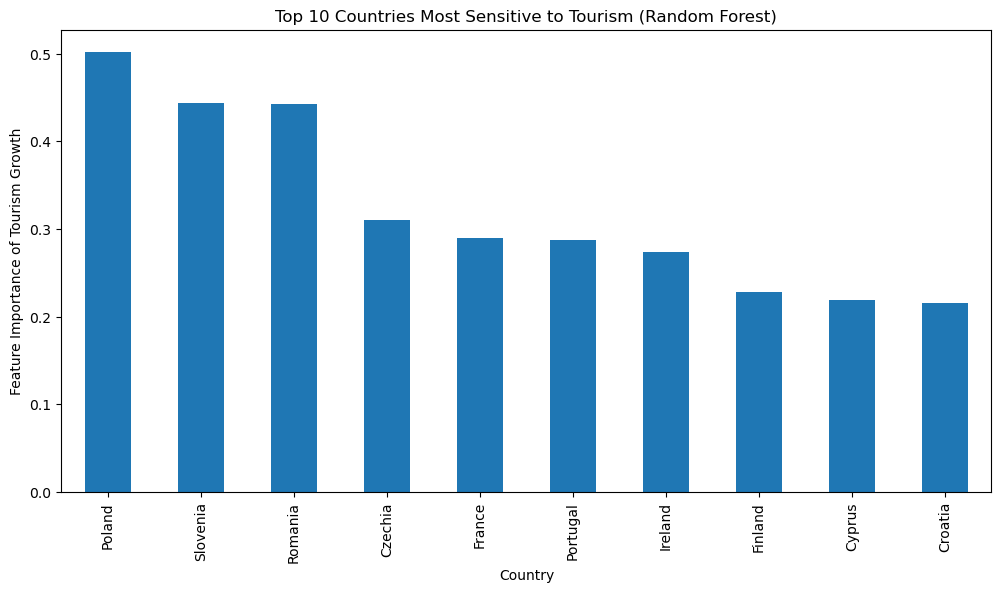


Per-country Tourism sensitivity (ordered by XGBoost)


,RF_Tourism_importance,XGB_Tourism_importance,RF_R2_CV,XGB_R2_CV
Poland,0.502242,0.558069,-3.985423,-1.769850
Albania,0.215224,0.478468,-16.191330,-21.186263
Finland,0.228167,0.474074,-16.979362,-21.613793
Slovenia,0.443339,0.308877,-3.487811,-2.037817
Ireland,0.273203,0.260884,-3.037209,-10.138649
Netherlands,0.032134,0.220147,-19.016743,-8.183785
Italy,0.099956,0.179766,-5.801774,-16.055896
Portugal,0.287374,0.144327,-4.397474,-3.286806
Czechia,0.310263,0.135080,-6.545667,-31.857294
Switzerland,0.192102,0.131877,-9.947053,-15.349026


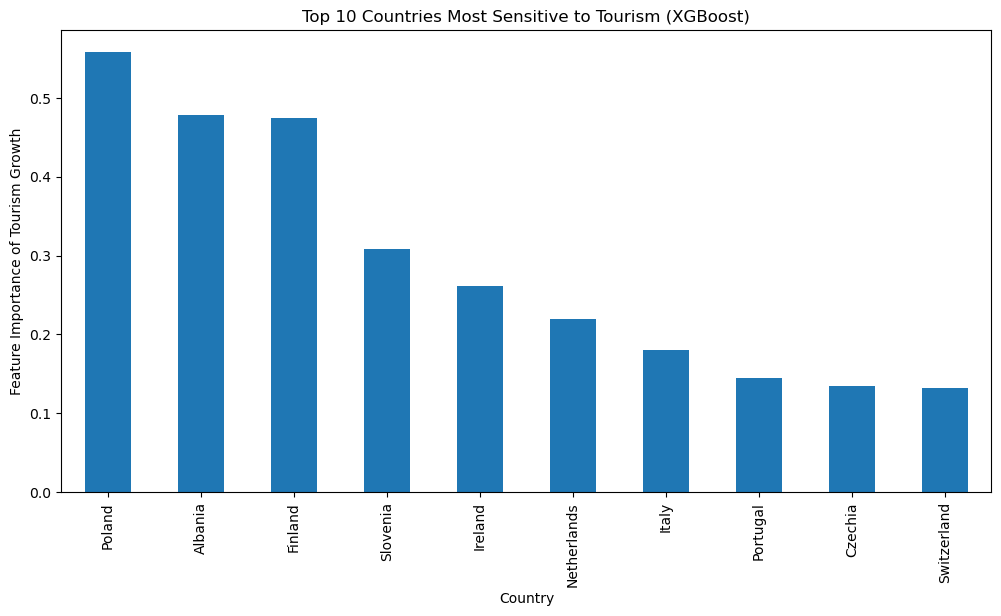

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Select features and target
features = [
    'Tourism_growth',
    'Population',
    'Unemployment_rate_pct',
    'Gross_fixed_capital_formation_pctGDP',
    'Trade_openness_pctGDP',
    'Inflation_pct',
    'Exchange_rate_local_to_USD',
    'Air_transport_passengers'
]
target = 'GDP_growth'

# Create dictionary for models results by country
rf_sensitivity = {}
xgb_sensitivity = {}
r2_scores_rf = {}
r2_scores_xgb = {}

# Time series cross val setup
tscv = TimeSeriesSplit(n_splits=5)  

# Create models for each country
for country in df['country'].unique():
    df_country = df[df['country'] == country].dropna(subset=features + [target])
    
    if len(df_country) < 10:
        # Not enough data for 5 splits
        continue
    
    X = df_country[features]
    y = df_country[target]

    # Train random forest and append cross val results
    rf = RandomForestRegressor(
        n_estimators=50,
        max_depth=4,
        random_state=42
    )
    rf_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)
        rf_scores.append(r2_score(y_test, preds))
    r2_scores_rf[country] = np.mean(rf_scores)
    rf_sensitivity[country] = rf.feature_importances_[0]

    # Train XGBoost and evaluate for each cross val split
    xgbr = xgb.XGBRegressor(
        n_estimators=50,
        max_depth=3,
        learning_rate=0.05,
        random_state=42,
        objective="reg:squarederror"
    )
    xgb_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        xgbr.fit(X_train, y_train)
        preds = xgbr.predict(X_test)
        xgb_scores.append(r2_score(y_test, preds))

    r2_scores_xgb[country] = np.mean(xgb_scores)
    xgb_sensitivity[country] = xgbr.feature_importances_[0]

# Store results for display
sensitivity_df = pd.DataFrame({
    'RF_Tourism_importance': pd.Series(rf_sensitivity),
    'XGB_Tourism_importance': pd.Series(xgb_sensitivity),
    'RF_R2_CV': pd.Series(r2_scores_rf),
    'XGB_R2_CV': pd.Series(r2_scores_xgb)
}).sort_values(by='RF_Tourism_importance', ascending=False)

print("\nPer-country Tourism sensitivity (TS-CV R^2)")
display(sensitivity_df)

# Plot RF importances
plt.figure(figsize=(12,6))
sensitivity_df['RF_Tourism_importance'].head(10).plot(kind='bar')
plt.title('Top 10 Countries Most Sensitive to Tourism (Random Forest)')
plt.ylabel('Feature Importance of Tourism Growth')
plt.xlabel('Country')
plt.show()

# Plot XGBoost importances
sensitivity_df_xgb = sensitivity_df.sort_values(by='XGB_Tourism_importance', ascending=False)
print("\nPer-country Tourism sensitivity (ordered by XGBoost)")
display(sensitivity_df_xgb)

plt.figure(figsize=(12,6))
sensitivity_df_xgb['XGB_Tourism_importance'].head(10).plot(kind='bar')
plt.title('Top 10 Countries Most Sensitive to Tourism (XGBoost)')
plt.ylabel('Feature Importance of Tourism Growth')
plt.xlabel('Country')
plt.show()
